<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_14_02_auto_encode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 14: Other Neural Network Techniques**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 14 Video Material

* Part 14.1: What is AutoML [[Video]](https://www.youtube.com/watch?v=1mB_5iurqzw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_14_01_automl.ipynb)
* **Part 14.2: Using Denoising AutoEncoders in Keras** [[Video]](https://www.youtube.com/watch?v=4bTSu6_fucc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_14_02_auto_encode.ipynb)
* Part 14.3: Training an Intrusion Detection System with KDD99 [[Video]](https://www.youtube.com/watch?v=1ySn6h2A68I&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb)
* Part 14.4: Anomaly Detection in Keras [[Video]](https://www.youtube.com/watch?v=VgyKQ5MTDFc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_14_04_ids_kdd99.ipynb)
* Part 14.5: The Deep Learning Technologies I am Excited About [[Video]]() [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_14_05_new_tech.ipynb)



# Part 14.2: Using Denoising AutoEncoders in Keras

Function approximation is perhaps the original task of machine learning. Long before computers and even the notion of machine learning, scientists came up with equations to fit their observations of nature. Scientists find equations to demonstrate correlations between observations. For example, various equations relate mass, acceleration, and force.

Looking at complex data and deriving an equation does take some technical expertise. The goal of function approximation is to remove intuition from the process and instead depend on an algorithmic method to automatically generate an equation that describes data. A regression neural network performs this task.  

We begin by creating a function that we will use to chart a regression function.

In [1]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Next, we will attempt to approximate a slightly random variant of the trigonometric sine function.

Actual
[[0.00071864]
 [0.01803382]
 [0.11465593]
 [0.1213861 ]
 [0.1712333 ]]
Pred
[[0.00078334]
 [0.0180243 ]
 [0.11705872]
 [0.11838552]
 [0.17200738]]


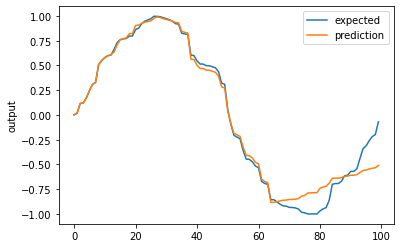

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = np.sort((360 * rng.rand(100, 1)), axis=0)
y = np.array([np.sin(x*(np.pi/180.0)).ravel()]).T

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=0,batch_size=len(x),epochs=25000)

pred = model.predict(x)

print("Actual")
print(y[0:5])

print("Pred")
print(pred[0:5])

chart_regression(pred.flatten(),y,sort=False)

As you can see, the neural network creates a reasonably close approximation of the random sine function.

## Multi-Output Regression

Unlike most models, neural networks can provide multiple regression outputs.  This feature allows a neural network to generate various outputs for the same input.  For example, you might train the MPG data set to predict MPG and horsepower.  One area in that multiple regression outputs can be helpful is autoencoders.  The following diagram shows a multi-regression neural network.  As you can see, there are multiple output neurons.  Usually, you will use multiple output neurons for classification.  Each output neuron will represent the probability of one of the classes.  However, in this case, it is a regression neural network.  Figure 13.MRG shows multi-output regression.

**Figure 14.MRG: Multi-Output Regression**
![Multi-Output Regression](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_13_multi_output.png "Multi-Output Regression")

The following program uses a multi-output regression to predict both [sin](https://en.wikipedia.org/wiki/Trigonometric_functions#Sine.2C_cosine_and_tangent) and [cos](https://en.wikipedia.org/wiki/Trigonometric_functions#Sine.2C_cosine_and_tangent) from the same input data.

In [3]:
from sklearn import metrics

rng = np.random.RandomState(1)
x = np.sort((360 * rng.rand(100, 1)), axis=0)
y = np.array([np.pi * np.sin(x*(np.pi/180.0)).ravel(), np.pi \
              * np.cos(x*(np.pi/180.0)).ravel()]).T

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2)) # Two output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=0,batch_size=len(x),epochs=25000)


# Fit regression DNN model.
pred = model.predict(x)

score = np.sqrt(metrics.mean_squared_error(pred, y))
print("Score (RMSE): {}".format(score))

np.set_printoptions(suppress=True)

print("Predicted:")
print(np.array(pred[20:25]))

print("Expected:")
print(np.array(y[20:25]))

Score (RMSE): 0.06136952220466956
Predicted:
[[2.720404   1.590426  ]
 [2.7611256  1.5165515 ]
 [2.9106038  1.2454026 ]
 [3.005532   1.0359662 ]
 [3.0415256  0.90731066]]
Expected:
[[2.70765313 1.59317888]
 [2.75138445 1.51640628]
 [2.89299999 1.22480835]
 [2.97603942 1.00637655]
 [3.01381723 0.88685404]]


## Simple Autoencoder

An autoencoder is a neural network with the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are precisely the same in an autoencoder. Because of this, we consider autoencoders to be unsupervised. Figure 14.AUTO shows an autoencoder. 

**Figure 14.AUTO: Simple Auto Encoder**
![Simple Auto Encoder](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_13_auto_encode.png "Simple Auto Encoder")

The following program demonstrates a very simple autoencoder that learns to encode a sequence of numbers. Fewer hidden neurons will make it more difficult for the autoencoder to understand.

In [4]:
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
import tensorflow as tf

x = np.array([range(10)]).astype(np.float32)
print(x)

model = Sequential()
model.add(Dense(3, input_dim=x.shape[1], activation='relu'))
model.add(Dense(x.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,x,verbose=0,epochs=1000)

pred = model.predict(x)
score = np.sqrt(metrics.mean_squared_error(pred,x))
print("Score (RMSE): {}".format(score))
np.set_printoptions(suppress=True)
print(pred)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]
Score (RMSE): 0.024245187640190125
[[0.00000471 1.0009701  2.0032287  3.000911   4.0012217  5.0025473
  6.025212   6.9308095  8.014739   9.014762  ]]


## Autoencode (single image)

We are now ready to build a simple image autoencoder.  The program below learns a capable encoding for the image.  You can see the distortions that occur.

49152
[[203. 217. 240. ...  94.  92.  68.]]
Neural network output
[[238.31088 239.55913 194.47536 ...  67.12295  66.15083  74.94332]]
[[203. 217. 240. ...  94.  92.  68.]]


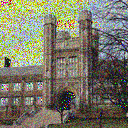

In [5]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
from tensorflow.keras.optimizers import SGD
import requests
from io import BytesIO

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    
img = Image.open(BytesIO(response.content))
img.load()
img = img.resize((128,128), Image.ANTIALIAS)
img_array = np.asarray(img)
img_array = img_array.flatten()
img_array = np.array([ img_array ])
img_array = img_array.astype(np.float32)
print(img_array.shape[1])
print(img_array)

model = Sequential()
model.add(Dense(10, input_dim=img_array.shape[1], activation='relu'))
model.add(Dense(img_array.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(img_array,img_array,verbose=0,epochs=20)

print("Neural network output")
pred = model.predict(img_array)
print(pred)
print(img_array)
cols,rows = img.size
img_array2 = pred[0].reshape(rows,cols,3)
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')
img2   

## Standardize Images

When processing several images together, it is sometimes essential to standardize them.  The following code reads a sequence of images and causes them to all be of the same size and perfectly square.  If the input images are not square, cropping will occur.

https://data.heatonresearch.com/images/jupyter/Brown_Hall.jpeg


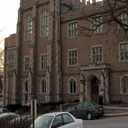

https://data.heatonresearch.com/images/jupyter/brookings.jpeg


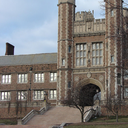

https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg


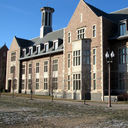

(3, 49152)


In [6]:
# HIDE OUTPUT 3
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML


images = [
    "https://data.heatonresearch.com/images/jupyter/Brown_Hall.jpeg",
    "https://data.heatonresearch.com/images/jupyter/brookings.jpeg",
    "https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg"
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)


## Image Autoencoder (multi-image)

Autoencoders can learn the same encoding for multiple images.  The following code learns a single encoding for numerous images. 

Creating/Training neural network
Score neural network
[ 0.98446846  0.9844943   0.98456836 ... -0.17971231 -0.20315537
 -0.20320868]


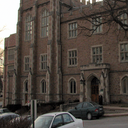

[ 0.5140943   0.59271055  0.6633089  ... -0.40498623 -0.40472946
 -0.54082954]


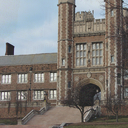

[-0.40605062  0.08633238  0.6571716  ... -0.12500083 -0.22656606
 -0.3437891 ]


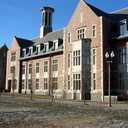

In [7]:
# HIDE OUTPUT 3
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 

# Fit regression DNN model.
print("Creating/Training neural network")
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(x.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,x,verbose=0,epochs=1000)

print("Score neural network")
pred = model.predict(x)

cols,rows = img.size
for i in range(len(pred)):
    print(pred[i])
    img_array2 = pred[i].reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    display(img2)   

## Adding Noise to an Image

Autoencoders can handle noise.  First, it is essential to see how to add noise to an image.  There are many ways to add such noise.  The following code adds random black squares to the image to produce noise.

Rows: 768, Cols: 1024
(768, 1024, 3)


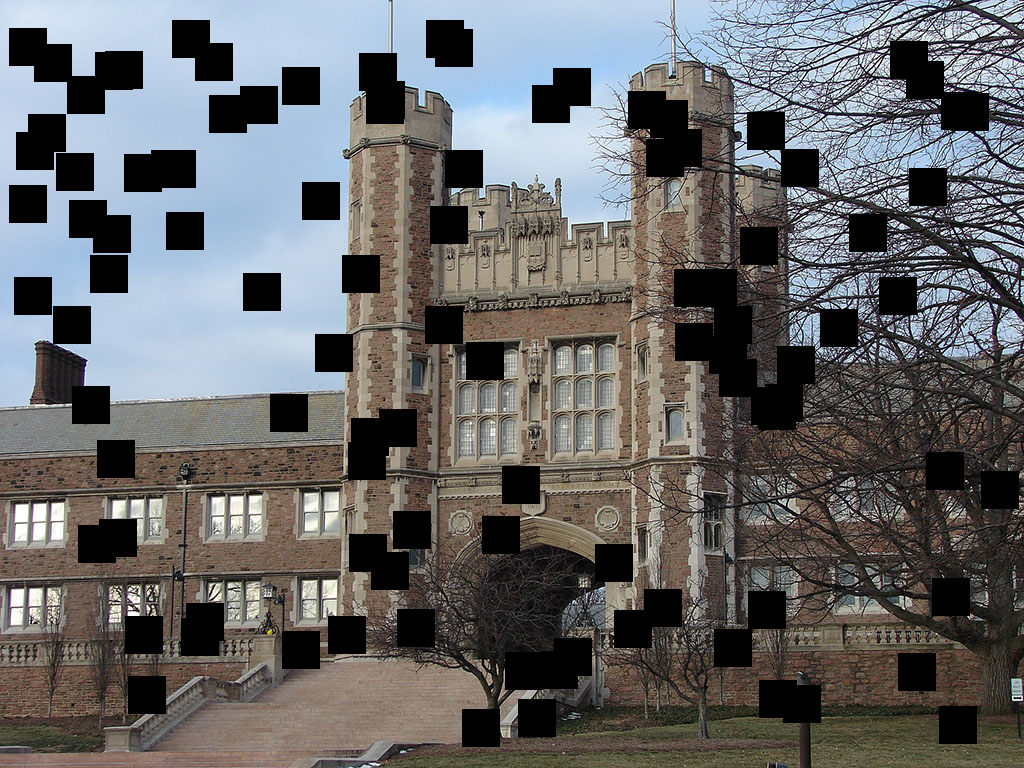

In [8]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2        
        

## Denoising Autoencoder

You design a denoising autoencoder to remove noise from input signals. You train the network to convert noisy data ($x$) to the original input ($y$). The $y$ becomes each image/signal (just like a normal autoencoder); however, the $x$ becomes a version of $y$ with noise added.  Noise is artificially added to the images to produce $x$.  The following code creates ten noisy versions of each of the images.

https://data.heatonresearch.com/images/jupyter/Brown_Hall.jpeg


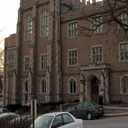

https://data.heatonresearch.com/images/jupyter/brookings.jpeg


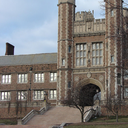

https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg


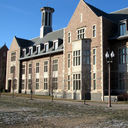

(30, 49152)
(30, 49152)


In [9]:
# HIDE OUTPUT 3
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

images = [
    "https://data.heatonresearch.com/images/jupyter/Brown_Hall.jpeg",
    "https://data.heatonresearch.com/images/jupyter/brookings.jpeg",
    "https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg"
]

def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = []    
y = []
loaded_images = []
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    
    loaded_images.append(img)
    print(url)
    display(img)
    for i in range(10):
        img_array = np.asarray(img)
        img_array_noise = add_noise(img_array)
        
        img_array = img_array.flatten()
        img_array = img_array.astype(np.float32)
        img_array = (img_array-128)/128
        
        img_array_noise = img_array_noise.flatten()
        img_array_noise = img_array_noise.astype(np.float32)
        img_array_noise = (img_array_noise-128)/128
        
        x.append(img_array_noise)
        y.append(img_array)
    
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)


We now train the autoencoder neural network to transform the noisy images into clean images.

In [10]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 

# Fit regression DNN model.
print("Creating/Training neural network")
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(x.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=1,epochs=20)

print("Neural network trained")


Creating/Training neural network
Epoch 1/20
1/1 [==============================] - 1s 541ms/step - loss: 0.2524
Epoch 2/20
1/1 [==============================] - 0s 100ms/step - loss: 0.2458
Epoch 3/20
1/1 [==============================] - 0s 101ms/step - loss: 0.2037
Epoch 4/20
1/1 [==============================] - 0s 111ms/step - loss: 0.1555
Epoch 5/20
1/1 [==============================] - 0s 94ms/step - loss: 0.1243
Epoch 6/20
1/1 [==============================] - 0s 106ms/step - loss: 0.1089
Epoch 7/20
1/1 [==============================] - 0s 98ms/step - loss: 0.0869
Epoch 8/20
1/1 [==============================] - 0s 94ms/step - loss: 0.0728
Epoch 9/20
1/1 [==============================] - 0s 103ms/step - loss: 0.0550
Epoch 10/20
1/1 [==============================] - 0s 107ms/step - loss: 0.0455
Epoch 11/20
1/1 [==============================] - 0s 102ms/step - loss: 0.0297
Epoch 12/20
1/1 [==============================] - 0s 113ms/step - loss: 0.0230
Epoch 13/20
1/1 [==

We are now ready to evaluate the results.

*** Trial 1
With noise:


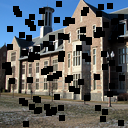

After auto encode noise removal


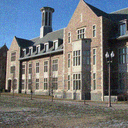

*** Trial 2
With noise:


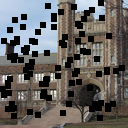

After auto encode noise removal


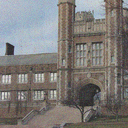

*** Trial 3
With noise:


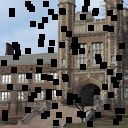

After auto encode noise removal


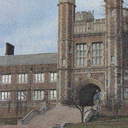

In [12]:
for z in range(3):
    print("*** Trial {}".format(z+1))
    
    # Choose random image
    i = np.random.randint(len(loaded_images))
    img = loaded_images[i]
    img_array = np.asarray(img)
    cols, rows = img.size

    # Add noise
    img_array_noise = add_noise(img_array)    

    #Display noisy image
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2, 'RGB')
    print("With noise:")
    display(img2)

    # Present noisy image to auto encoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    pred = model.predict(img_array_noise)[0]

    # Display neural result
    img_array2 = pred.reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    print("After auto encode noise removal")
    display(img2)